<a href="https://colab.research.google.com/github/AminNaghiyan/social-network-final-project/blob/main/Social_Network_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
*   Course: Social Networks
*   Topic: Final Project
*   Author: Mohammad Amin Naghiyan - 993623041
*   GitHub URL: https://github.com/AminNaghiyan/social-network-final-project



---





#  کردن کتابخانه‌ها import

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")
import os
import json
import csv
import re
from datetime import date, datetime, timezone
# miscellaneous
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
def install_java():
  import os
  # install java, it is not needed if installed
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
import os
# download and install Elasticsearch
!wget -q https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-8.8.0-linux-x86_64.tar.gz
# unzip the elasticsearch file to the current folder
!tar -xzvf elasticsearch-8.8.0-linux-x86_64.tar.gz
# rename for user-friendly and better readability
!mv elasticsearch-8.8.0 elasticsearch
# set elasticsearch path to system path environment
os.environ["ES_HOME"] = "/content/elasticsearch"
!pip install elasticsearch
!pip install elasticsearch_dsl

elasticsearch-8.8.0/
elasticsearch-8.8.0/lib/
elasticsearch-8.8.0/lib/elasticsearch-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-preallocate-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-x-content-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-lz4-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-cli-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-core-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-logging-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-secure-sm-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-geo-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-plugin-analysis-api-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-plugin-api-8.8.0.jar
elasticsearch-8.8.0/lib/elasticsearch-grok-8.8.0.jar
elasticsearch-8.8.0/lib/lucene-core-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-analysis-common-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-backward-codecs-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-grouping-9.6.0.jar
elasticsearch-8.8.0/lib/lucene-highlighter-9.6.0.jar
elasticsearch-8.8.0/li

# گام اول: واکشی دیتاست

I prepared a dataset containing 2000 tweets about the final season of Game of Thrones. I read the file `sampled2_gotTwitter.csv` which contains these tweets and is uploaded on google drive.

In [ ]:
# dataset name
dataset_name = "sampeled2_gotTwitter.csv"
data_seperator = ","

In [ ]:
# mount Google Drive to access the dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# file path on Google Drive
drive_file_path = f"/content/drive/My Drive/{dataset_name}"
# load data from csv to a dataframe.
tweets = pd.read_csv(drive_file_path)
#spark = init_pyspark("myapp")
#raw_offline_tweets_df = spark.read.csv(drive_file_path, sep= data_seperator, header = True, inferSchema = True)

In [ ]:
tweets = tweets[["user_id", "created_at", "screen_name", "name", "text", "reply_to_user_id", "reply_to_screen_name", "is_quote", "favorite_count", "retweet_count", "hashtags", "mentions_user_id", "mentions_screen_name", "quoted_user_id", "quoted_screen_name", "followers_count", "friends_count", "favourites_count", "account_created_at", "verified"]]

In [ ]:
tweets

,user_id,created_at,screen_name,name,text,reply_to_user_id,reply_to_screen_name,is_quote,favorite_count,retweet_count,hashtags,mentions_user_id,mentions_screen_name,quoted_user_id,quoted_screen_name,followers_count,friends_count,favourites_count,account_created_at,verified
0,x51554079,2019-04-17 07:34:18,moevazquez,lagoon monster,👍 on @YouTube: GAME OF THRONES 8x01 Breakdown!...,NaN,NaN,False,0,0,NaN,x10228272,YouTube,NaN,NaN,4497,4984,36131,2009-06-27 20:58:25,False
1,x51554079,2019-04-16 03:34:16,moevazquez,lagoon monster,👍 on @YouTube: Ups and Downs From Game Of Thro...,NaN,NaN,False,0,0,NaN,x10228272,YouTube,NaN,NaN,4497,4984,36131,2009-06-27 20:58:25,False
2,x51554079,2019-04-16 03:06:08,moevazquez,lagoon monster,Liked on YouTube: Ups and Downs From Game Of T...,NaN,NaN,False,0,0,NaN,NaN,NaN,NaN,NaN,4497,4984,36131,2009-06-27 20:58:25,False
3,x51554079,2019-04-17 07:07:38,moevazquez,lagoon monster,Liked on YouTube: GAME OF THRONES 8x01 Breakdo...,NaN,NaN,False,0,0,NaN,NaN,NaN,NaN,NaN,4497,4984,36131,2009-06-27 20:58:25,False
4,x770111944187580416,2019-04-17 07:34:09,whoisScottyP,scotty p,@MrLegenDarius unpopular opinion: game of thro...,x37078228,MrLegenDarius,False,0,0,NaN,x37078228,MrLegenDarius,NaN,NaN,168,180,25651,2016-08-29 04:12:50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,x2735685744,2019-04-16 19:31:04,ogobogocom,oGoBoGo,"I Know Nothing About ""Game Of Thrones"", Here A...",NaN,NaN,False,0,0,NaN,NaN,NaN,NaN,NaN,387,496,5,2014-08-15 22:18:00,False
1996,x2735685744,2019-04-16 14:01:03,ogobogocom,oGoBoGo,101 Behind-The-Scenes Facts And Small Details ...,NaN,NaN,False,0,0,NaN,NaN,NaN,NaN,NaN,387,496,5,2014-08-15 22:18:00,False
1997,x2735685744,2019-04-16 20:31:04,ogobogocom,oGoBoGo,"23 ""Game Of Thrones"" Memes From Season 8, Epis...",NaN,NaN,False,0,0,NaN,NaN,NaN,NaN,NaN,387,496,5,2014-08-15 22:18:00,False
1998,x2735685744,2019-04-17 03:01:04,ogobogocom,oGoBoGo,"Seriously, Where Is Ghost On ""Game Of Thrones""...",NaN,NaN,False,0,0,NaN,NaN,NaN,NaN,NaN,387,496,5,2014-08-15 22:18:00,False


# گام دوم: معیارهای اهمیت و مرکزیت

In this step, I try to create a graph of the existing network using the network x library in Python. The edges of this graph are formed by replays and mentions in this dataset. Then, using this library, we calculate the five measures of degree centrality, betweenness centrality, closeness centrality, eigenvector centrality and pagerank for the nodes. And finally, for each of these criteria, we display 5 nodes with the highest score.

In [ ]:
graph_df = pd.DataFrame(columns=["source", "target"])
for ind in tweets.index:
    if not pd.isnull(tweets['reply_to_user_id'][ind]):
        link_dict = {'source': [tweets['user_id'][ind]], 'target': [tweets['reply_to_user_id'][ind]]}
        link_df = pd.DataFrame(link_dict)
        graph_df = pd.concat([graph_df, link_df], ignore_index=True)

    if not pd.isnull(tweets['mentions_user_id'][ind]):
        mentions_str = tweets['mentions_user_id'][ind]
        mentions = mentions_str.split(' ')
        for mention_id in mentions:
            link_dict = {'source': [tweets['user_id'][ind]], 'target': mention_id}
            link_df = pd.DataFrame(link_dict)
            graph_df = pd.concat([graph_df, link_df], ignore_index=True)

graph = nx.from_pandas_edgelist(graph_df, create_using=nx.Graph())

degree_centrality = nx.degree_centrality(graph)

betweenness_centrality = nx.betweenness_centrality(graph)

closeness_centrality = nx.closeness_centrality(graph)

eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=600)

pagerank = nx.pagerank(graph)

In [ ]:
print(graph)

Graph with 666 nodes and 440 edges


## Degree Centrality پنج گره با بیشترین

In [ ]:
top5centrality = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5centrality_df = pd.DataFrame(top5centrality,
                                 columns=["user_id", "degree_centrality"]
                                 )
top5centrality_df

,user_id,degree_centrality
0,x10228272,0.025564
1,x180463340,0.022556
2,x873032301143248898,0.018045
3,x112764063,0.015038
4,x937507981943455744,0.013534


## Betweenness Centrality پنج گره با بیشترین

In [ ]:
top5_betweenness = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5_betweenness_df = pd.DataFrame(top5_betweenness, columns=["user_id", "betweenness_centrality"])
top5_betweenness_df

,user_id,betweenness_centrality
0,x180463340,0.003125
1,x208404913,0.001214
2,x76685566,0.001214
3,x10228272,0.000847
4,x16331010,0.000833


## Closeness Centrality پنج گره با بیشترین

In [ ]:
top5_closeness = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5_closeness_df = pd.DataFrame(top5_closeness, columns=["user_id", "closeness_centrality"])
top5_closeness_df

,user_id,closeness_centrality
0,x180463340,0.028988
1,x10228272,0.026152
2,x208404913,0.022698
3,x76685566,0.022698
4,x15279429,0.021105


## Eigenvector Centrality پنج گره با بیشترین

In [ ]:
top5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse=True)[:5]
top5_eigenvector_df = pd.DataFrame(top5_eigenvector, columns=["user_id", "eigenvector_centrality"])
top5_eigenvector_df

,user_id,eigenvector_centrality
0,x10228272,0.703083
1,x445996563,0.180079
2,x154049579,0.180079
3,x1073438413012066305,0.180079
4,x51554079,0.169601


## PageRank پنج گره با بیشترین

In [ ]:
top5_pagerank = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)[:5]
top5_pagerank_df = pd.DataFrame(top5_pagerank, columns=["user_id", "pagerank"])
top5_pagerank_df

,user_id,pagerank
0,x10228272,0.012234
1,x180463340,0.010065
2,x873032301143248898,0.009079
3,x112764063,0.007701
4,x937507981943455744,0.007012


# گام سوم: تعیین کلمات کلیدی و مثبت یا منفی بودن آنها

In order to determine the keywords and frequently used words and whether the words are positive or negative, first, additional items inside the text of the tweets, including emojis, links, etc., must be removed so that the analysis can be cited. At first, we do these tasks by `preprocess_text` and `process_text` functions. In the next step, we get the most repeated words in the `clean_tweet` column. We use the `analyze_sentiment` function to determine whether the words are positive or negative. In this function, using the nltk library, a score is considered for each word. If this score is greater than zero, the word is considered positive, if it is less than zero, the word is considered negative, and if it is zero, it is considered neutral.

In [ ]:
!pip install nltk
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
  import re
  import os
  from collections import Counter
  response = {}
  #tweet = p.clean(tweet)
  # make all words in small letter
  text = text.lower()
  # get all hashtags
  hashtags = re.findall(r"#\w+", text)
  hashtags = Counter(hashtags).most_common()[:6]
  response["hashtags"] = hashtags
  # remove links
  text = re.sub(r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+(/\S+)?|\S+\.com\S+", "", text)
  # remove the hashtags and mentions
  text = re.sub(r"#\w+|@\w+", "", text)
  # remove Emoji patterns, emoticons, symbols & pictographs, transport & map symbols, flags (iOS), etc
  webpattern = re.compile("["
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF"
                              u"\U0001F1E0-\U0001F1FF"
                              u"\U00002500-\U00002BEF"
                              u"\U00002702-\U000027B0"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U00010000-\U0010ffff"
                              u"\u2640-\u2642"
                              u"\u2600-\u2B55"
                              u"\u200d"
                              u"\u23cf"
                              u"\u23e9"
                              u"\u231a"
                              u"\ufe0f"
                              u"\u3030"
                              "]+", flags=re.UNICODE)
  text = webpattern.sub(r'', text)
  #remove non alpha words
  # text = re.findall(r"\w{3,}", text)
  # text = ' '.join(text)
  response["preprocess_text"] = text
  return text

In [ ]:
def process_text(content, lang = "en", is_json = False, field_name = "tweet"):

  import string
  import nltk
  from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer, lm, FreqDist
  from nltk.corpus import stopwords
  from regex import match as re_match

  text = ""

  if is_json and field_name != None :
    json = json.loads(content)
    text = json["tweet"]
  else :
    text = content
    t = content

  if lang == "en" :
    c=0

  # remove stopwords
  def remove_stopwords(text, return_array = False):
      stop_words = set(stopwords.words("english"))
      word_tokens = word_tokenize(text)
      filtered_text = [word for word in word_tokens if word not in stop_words]
      return filtered_text if return_array else " ".join(filtered_text)

  # stem words in the list of tokenized words
  def stem_words(text, return_array = False):
      stemmer = PorterStemmer()
      word_tokens = word_tokenize(text)
      stems = [stemmer.stem(word) for word in word_tokens]
      return stems if return_array else " ".join(stems)

  # lemmatize string & provide context i.e. part-of-speech
  def lemmatize_word(text, return_array = False):
      lemmatizer = WordNetLemmatizer()
      word_tokens = word_tokenize(text)
      lemmas = [lemmatizer.lemmatize(word) for word in word_tokens]
      return lemmas if return_array else " ".join(lemmas)

  text = remove_stopwords(text)
  text = stem_words(text)
  text = lemmatize_word(text)

  return text

In [ ]:
def analyze_sentiment(content, lang = "en", is_json = False, field_name = "tweet"):
  #import pdb
  #pdb.set_trace()

  import json
  import nltk
  from nltk.sentiment.vader import SentimentIntensityAnalyzer
  from textblob import TextBlob

  text = ""
  sentiment_status = ""
  text_sentiment1 = ""
  text_sentiment2 = ""


  if is_json and field_name != None :
    json = json.loads(content)
    text = json["tweet"]
  else :
    text = content


  # get the polarity score
  """
  # calculate polarity using TextBlob analyser
  sentiment_result_textblob = TextBlob(text)
  polarity_textblob = sentiment_result_textblob.sentiment.polarity

  if polarity_textblob > 0:
    sentiment_status = "Positive"
  elif polarity_textblob < 0:
    sentiment_status = "Negative"
  elif polarity_textblob == 0:
    sentiment_status = "Neutral"
  """

  # calculate polarity using NLTK-Vader analyser
  vader_analyzer = SentimentIntensityAnalyzer()
  sentiment_result_vader = vader_analyzer.polarity_scores(text)

  if sentiment_result_vader["compound"] > 0:
    sentiment_status = "Positive"
  elif sentiment_result_vader["compound"] < 0:
    sentiment_status = "Negative"
  elif sentiment_result_vader["compound"] == 0:
    sentiment_status = "Neutral"

  return sentiment_status

In [ ]:
tweets['clean_tweet'] = np.vectorize(preprocess_text)(tweets['text'])

In [ ]:
tweets['clean_tweet'] = np.vectorize(process_text)(tweets['clean_tweet'])

In [ ]:
tweets['clean_tweet'] = tweets['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [ ]:
from collections import Counter

dt = tweets['clean_tweet']

word_count = Counter(" ".join(dt).split()).most_common(25)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])

In [ ]:
word_frequency

,Word,Frequency
0,game,1822
1,throne,1809
2,watch,394
3,season,391
4,episod,217
5,premier,176
6,like,147
7,show,106
8,final,101
9,start,93


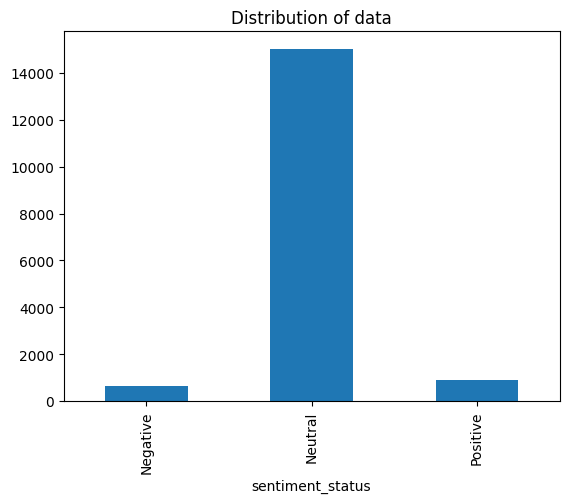

In [ ]:
words = tweets['clean_tweet']
word_table = pd.DataFrame(" ".join(words).split(), columns=['Word'])
word_table["sentiment_status"] = np.vectorize(analyze_sentiment)(word_table['Word'])
ax = word_table.groupby('sentiment_status').count().plot(kind='bar', title='Distribution of data',legend=False)


# گام چهارم: تعیین کاربران فعال

In this step, we extract the number of tweets of all users and identify the users who have the highest number of tweets as active users. Finally, to determine the effectiveness of users, we define a score for each one. This score is obtained from the total number of likes and retweets of that user, and if the user is verified, 50% will be added to his score.

In [ ]:
active_users = tweets[['user_id',"screen_name", "name"]]
sf = active_users['user_id'].value_counts()
s = pd.DataFrame({'user_id':sf.index, 'tweet_counts':sf.values})
active_users = pd.merge(active_users, s, how='right', on=['user_id'])
active_users =active_users.drop_duplicates(subset=['user_id'])
active_users = active_users.reset_index()
active_users = active_users.drop('index', axis=1)
active_users = active_users.head(15)

In [ ]:
active_users

,user_id,screen_name,name,tweet_counts
0,x112764063,TriviaAD,"Trivia, AD",35
1,x2172922045,OnePerfectShot,One Perfect Shot,29
2,x915779247968530432,tvsotherworlds,TV's Other Worlds,26
3,x5695632,BuzzFeed,BuzzFeed,22
4,x13992132,IndieWire,IndieWire,19
5,x15279429,VanityFair,VANITY FAIR,18
6,x3238757417,Sortiwa,Sortiwa,17
7,x615142627,e_newsUS,e-news.US,17
8,x1013741299596447744,BestTenNews1,Best Ten News,16
9,x2720421742,laursdebut,ؘ,15


In [ ]:
active_users['influence_rate'] = 0

In [ ]:
active_users

,user_id,screen_name,name,tweet_counts,influence_rate
0,x112764063,TriviaAD,"Trivia, AD",35,0
1,x2172922045,OnePerfectShot,One Perfect Shot,29,0
2,x915779247968530432,tvsotherworlds,TV's Other Worlds,26,0
3,x5695632,BuzzFeed,BuzzFeed,22,0
4,x13992132,IndieWire,IndieWire,19,0
5,x15279429,VanityFair,VANITY FAIR,18,0
6,x3238757417,Sortiwa,Sortiwa,17,0
7,x615142627,e_newsUS,e-news.US,17,0
8,x1013741299596447744,BestTenNews1,Best Ten News,16,0
9,x2720421742,laursdebut,ؘ,15,0


In [ ]:
def score_calc(user_id, tweets):
  df = tweets[tweets['user_id'] == user_id]
  score = 0
  for index in df.index:
    score += df['favorite_count'][index]
    score += df['retweet_count'][index]
    if (df['verified'][index] == True):
      score += score/2
    return score

In [ ]:
for i in active_users.index:
  score = score_calc(active_users['user_id'][i], tweets)
  active_users['influence_rate'][i] = score

In [ ]:
active_users

,user_id,screen_name,name,tweet_counts,influence_rate
0,x112764063,TriviaAD,"Trivia, AD",35,0.0
1,x2172922045,OnePerfectShot,One Perfect Shot,29,354.0
2,x915779247968530432,tvsotherworlds,TV's Other Worlds,26,0.0
3,x5695632,BuzzFeed,BuzzFeed,22,210.0
4,x13992132,IndieWire,IndieWire,19,61.5
5,x15279429,VanityFair,VANITY FAIR,18,45.0
6,x3238757417,Sortiwa,Sortiwa,17,0.0
7,x615142627,e_newsUS,e-news.US,17,0.0
8,x1013741299596447744,BestTenNews1,Best Ten News,16,0.0
9,x2720421742,laursdebut,ؘ,15,0.0


# گام پنجم: شناسایی جامعه‌های فعال

In this step, using the function nx.algorithms.community.greedy_modularity_communities(graph), we obtain the communities in the graph formed in the second step. Then, to find active communities, we find the number of edges in each community and divide this number by the size of the community to get an average. Finally, we use this average to rank the communities.

In [ ]:
communities = nx.algorithms.community.greedy_modularity_communities(graph)

communities_df = pd.DataFrame({'community': communities})

In [ ]:
communities_df

,community
0,"(x17525171, x79273453, x4708881315, x135586431..."
1,"(x445996563, x93914217, x809908063666700288, x..."
2,"(x83136995, x542951971, x19368416, x1054041110..."
3,"(x4827430750, x144659935, x75586421, x15714490..."
4,"(x18172709, x843375331255902208, x110024112591..."
...,...
249,(x192758932)
250,(x2150172150)
251,(x19979873)
252,(x18602100)


In [ ]:
def num_of_communication(community):
    communication_count = 0
    for node1 in community:
        for node2 in community:
            if node1 != node2:
                if graph.has_node(node1) and graph.has_node(node2):
                    edges_between_nodes = graph.number_of_edges(node1, node2)
                    communication_count += edges_between_nodes
    return communication_count


def communication_average(community, community_count):
    return community_count/len(community)


communities_df['count_of_communications'] = np.vectorize(num_of_communication)(communities_df['community'])
communities_df['avg_of_communications'] = np.vectorize(communication_average)(communities_df['community'], communities_df['count_of_communications'])

In [ ]:
communities_df

,community,count_of_communications,avg_of_communications
0,"(x17525171, x79273453, x4708881315, x135586431...",62,1.937500
1,"(x445996563, x93914217, x809908063666700288, x...",40,1.904762
2,"(x83136995, x542951971, x19368416, x1054041110...",24,1.846154
3,"(x4827430750, x144659935, x75586421, x15714490...",20,1.818182
4,"(x18172709, x843375331255902208, x110024112591...",18,1.800000
...,...,...,...
249,(x192758932),0,0.000000
250,(x2150172150),0,0.000000
251,(x19979873),0,0.000000
252,(x18602100),0,0.000000


#  Kibana و ElasticSearch گام ششم: تحلیل با استفاده از

In this step, we try to enter our dataset on elastic search. First, we create an index called search-tweets on the Elastic Search site. Then we define a client with its address and api key so that we can do the desired tasks with it. In the next step, we put the desired mapping on the index and then send the data to ElasticSearch.

In [ ]:
from elasticsearch import Elasticsearch, helpers

In [ ]:
client = Elasticsearch(
  "https://f86169d11dc146508c61edf9d5ee5ab9.us-central1.gcp.cloud.es.io:443",
  api_key="eDVEdFBJMEJOU0ZFbDFmZzVqRF86ck5KZTBXU1VSM2lHQjBQMmh2LVlkQQ=="
)

In [ ]:
client.indices.put_mapping(
    index="search-tweets",
    # doc_type="document_type",
    body={
        "properties": {
            "user_id": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
            "created_at": {
              "type": "date",
              "format": "yyyy-MM-dd HH:mm:ss"
            },
            "screen_name": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
            "name": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
            "clean_tweet": {
              "type": "text",
              "fields": {
                  "keyword": {
                      "type": "keyword",
                      "ignore_above": 256
                  }
              }
            },
        }
    }
)

ObjectApiResponse({'acknowledged': True})

In [ ]:
INDEX="search-tweets1"
TYPE= "record"

def doc_generator(df):
    import json
    for record in df.to_dict(orient="records"):
        yield ('{ "index" : { "_index" : "%s"}}'% (INDEX))
        yield (json.dumps(record, default=int))


client.bulk(operations=doc_generator(tweets[["user_id", "created_at", "screen_name", "name", "clean_tweet"]]), pipeline="ent-search-generic-ingestion")

ObjectApiResponse({'errors': False, 'took': 82, 'ingest_took': 15, 'items': [{'index': {'_index': 'search-tweets2', '_id': '2ZD0PI0BNSFEl1fgfzBO', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 0, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweets2', '_id': '2pD0PI0BNSFEl1fgfzBO', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 0, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweets2', '_id': '25D0PI0BNSFEl1fgfzBO', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 1, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweets2', '_id': '3JD0PI0BNSFEl1fgfzBO', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 2, 'failed': 0}, '_seq_no': 2, '_primary_term': 1, 'status': 201}}, {'index': {'_index': 'search-tweets2', '_id': '3ZD0PI0BNSFEl1fgfzBO', '_ver

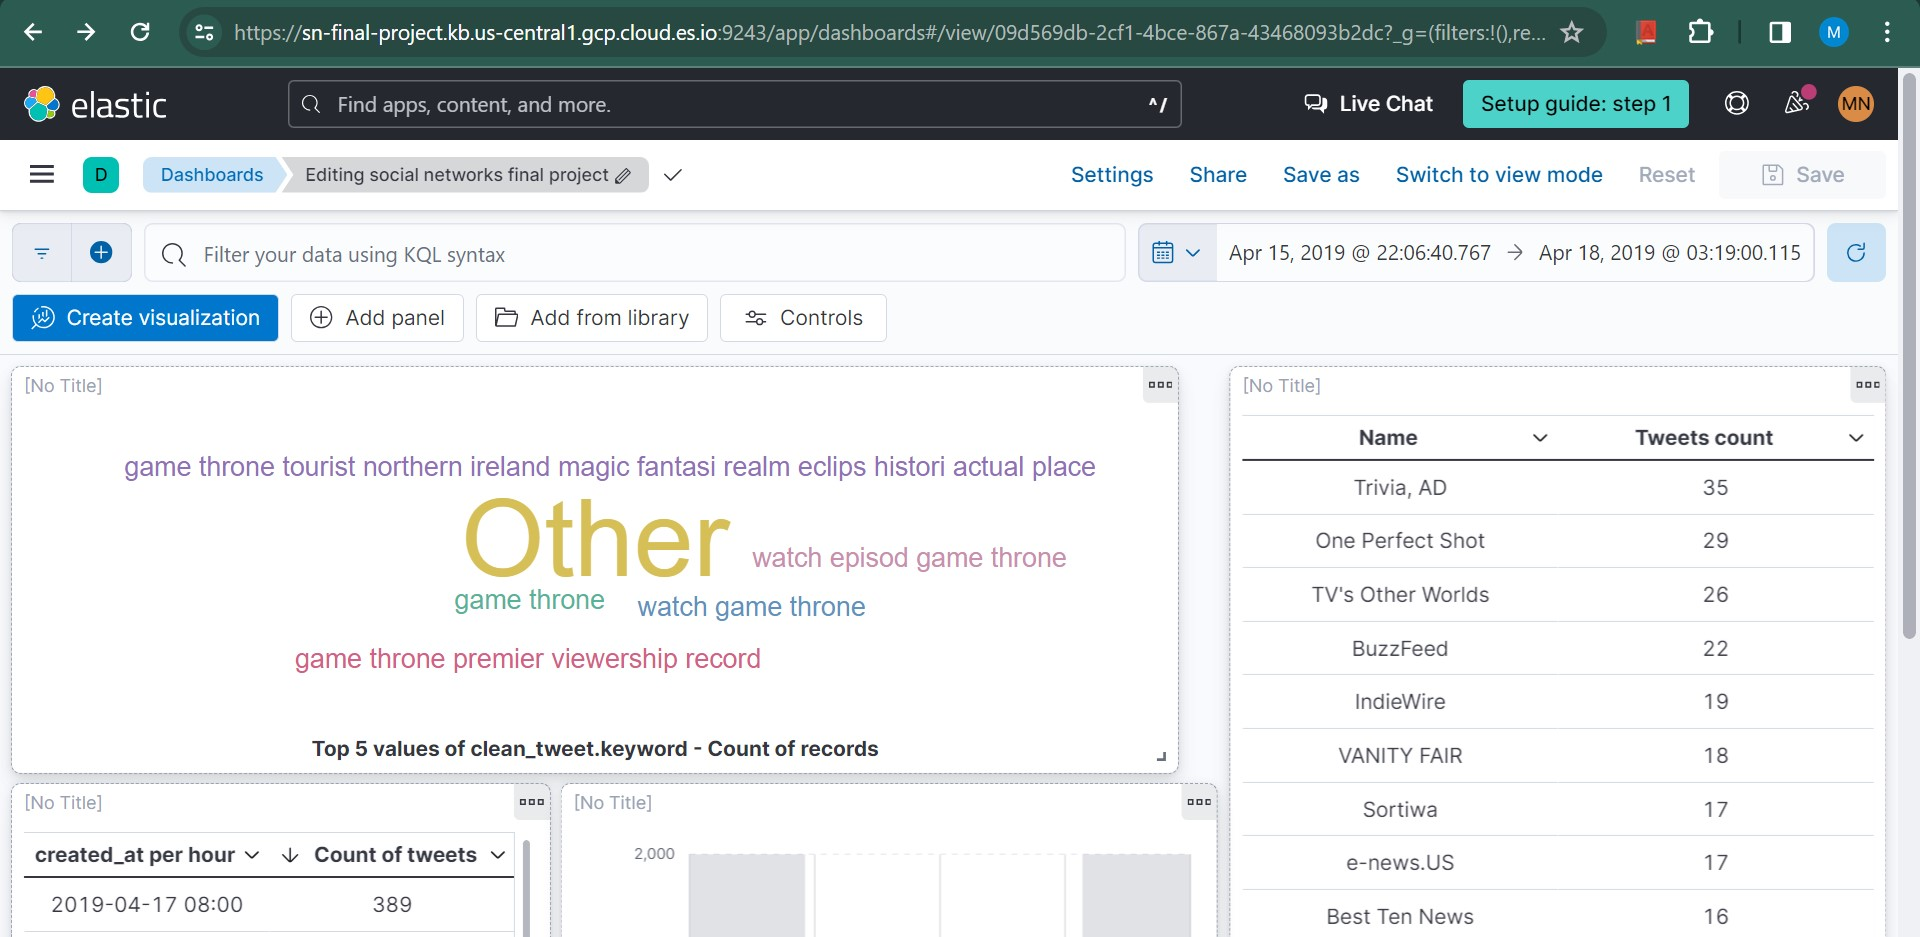